In [245]:
%run constants.ipynb
import numpy as np
import matplotlib.pyplot as plt

In [246]:
def read(n):
    with open(f'n={n}_coords_f') as fp:
        lines = fp.readlines()
        lines = [tuple(line.strip().split(',')) for line in lines]
        lines = [(int(x), int(y), float(fval), int(z)) for x,y,fval,z in lines]
    return zip(*lines)  # unzip into parallel lists

In [247]:
XYZ_SUM=2000

In [250]:
xs, ys, fvals, _ = tuple(read(2))

In [251]:
from collections import Counter
Counter(fvals)

Counter({0.10555555555555557: 44334,
         0.07777777777777778: 17095,
         0.04999999999999999: 60355,
         0.0222222222222222: 41120})

In [289]:
from matplotlib.colors import Normalize, LogNorm, ListedColormap, BoundaryNorm

# if y&z version, then x(old) -> y, y(old) -> z
def subplot_f(n, ax=None):
    xs, ys, fvals, _ = tuple(read(n))

    # color map
    fval_counts = Counter(fvals)
    base_cmap = plt.get_cmap('GnBu')
    cmap = ListedColormap(base_cmap(np.linspace(0,1, len(fval_counts))))
    norm = BoundaryNorm(sorted(list(fval_counts.keys())), cmap.N)
    scatter = ax.scatter(xs, ys, 
                         c=fvals, cmap=cmap, norm=norm,
                         s=30)
    # x<y boundary
#     xlim = (1, XYZ_SUM//3)
#     ylim = (1, XYZ_SUM//2)
#     boundary_label = 'x=y'
#     xlabel = 'x'
#     ylabel = 'y'
    xlim = (1, XYZ_SUM//2)
    ylim = (1, XYZ_SUM)
    y_vals = np.linspace(*ylim)
    bnd1 = y_vals
    bnd2 = XYZ_SUM - 2*y_vals
    bnd3 = XYZ_SUM - y_vals
    
    # z = y
    bound1, = ax.plot(y_vals, bnd1, linestyle='--', color='red', label='y=z')
    # z = 2000 - 2y
    bound2, = ax.plot(y_vals, bnd2, linestyle='--', color='red', label='z=2000-2y')
    # z = 2000 - y
    bound3, = ax.plot(y_vals, bnd3, linestyle='--', color='red', label='z=2000-y')
    
    ax.annotate('y=z', fontsize=12, color='red', 
               xy=(0.2, 0.17), xycoords='axes fraction')
    ax.annotate('z=2000-2y', fontsize=12, color='red', 
               xy=(0.64, 0.1), xycoords='axes fraction')
    ax.annotate('z=2000-y', fontsize=12, color='red', 
               xy=(0.64, 0.8), xycoords='axes fraction')
    
    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_title(f'n={n}')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.grid(visible=True)
    ax.set_aspect(0.6)
    
    return scatter

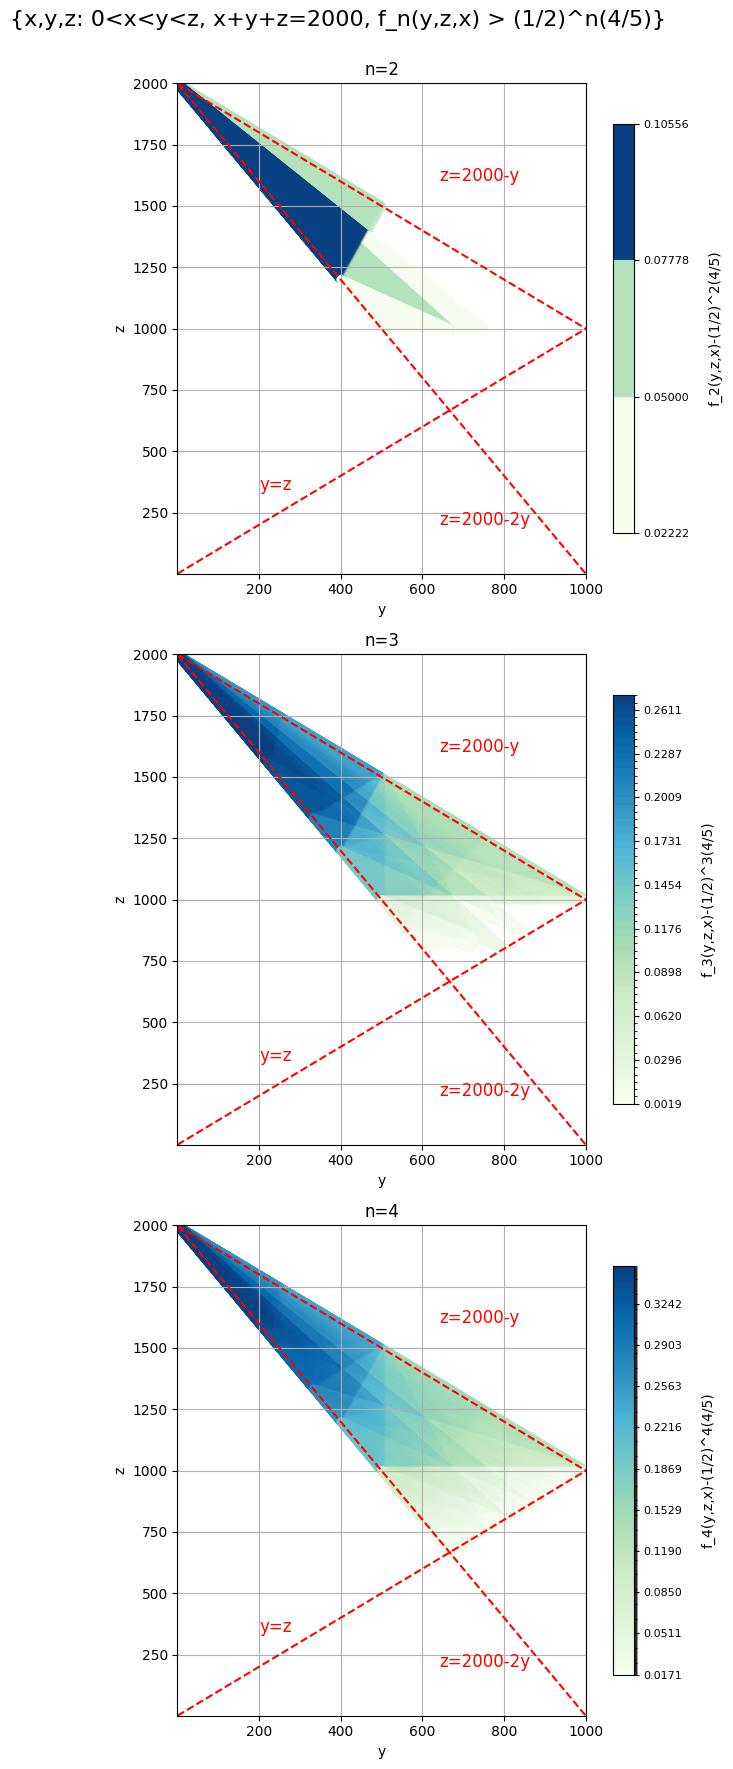

In [290]:
fig, axs = plt.subplots(3,1, figsize=(8,18))
ns = [2,3,4]
# cbar_label = (lambda n: f'f_{n}(x,y,z)-(1/2)^{n}(4/5)')
# title = '{x,y,z: 0<x<y<z, x+y+z=2000, f_n(x,y,z) > (1/2)^n(4/5)}'
# figname = 'f_n(x,y,z)-thresh(n).png'
cbar_label = (lambda n: f'f_{n}(y,z,x)-(1/2)^{n}(4/5)')
title = '{x,y,z: 0<x<y<z, x+y+z=2000, f_n(y,z,x) > (1/2)^n(4/5)}'
figname = 'f_n(y,z,x)-thresh(n).png'

for i in range(3):
    n = ns[i]
    scatter = subplot_f(n, ax=axs[i])
    # color bar based on f_n(x,y,z) - thresh(n) values
    cbar = fig.colorbar(scatter, ax=axs[i], 
                       fraction=0.03, pad=0.04)
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label(cbar_label(n), labelpad=14)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])

# fig.legend(scatters, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.suptitle(title,
            x=0.5, y=0.98, fontsize=16)
fig.savefig(figname, 
            dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(8,18))
ns = [2,3,4]

for i in range(3):
    n = ns[i]
    scatter = subplot_f(n, ax=axs[i])
    # color bar based on f_n(x,y,z) - thresh(n) values
    cbar = fig.colorbar(scatter, ax=axs[i], 
                       fraction=0.03, pad=0.04)
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label(f'f_{n}(x,y,z)-(1/2)^{n}(4/5)', labelpad=14)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])

# fig.legend(scatters, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.suptitle('{x,y,z: 0<x<y<z, x+y+z=2000, f_n(x,y,z) > (1/2)^n(4/5)}',
            x=0.5, y=0.98, fontsize=16)
fig.savefig('f_n(x,y,z)-thresh(n).png', 
            dpi=300, bbox_inches='tight')
plt.show()